In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from split_scale import split_my_data
from acquire import get_iris_data
import prep

import warnings
warnings.filterwarnings("ignore")

## Importing Data from Excel

Read `Table1_CustDetails` the excel module dataset, `Excel_Exercises.xlsx`, into a dataframe, `df_excel`
- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [ ]:
# df_excel = pd.read_excel(sheet_name:)

## Importing Data from Google Sheet

Read the data from [this](https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357) google sheet into a dataframe, `df_google`.

   - print the first 3 rows
   - print the number of rows and columns
   - print the column names
   - print the data type of each column
   - print the summary statistics for each of the numeric variables
   - print the unique values for each of your categorical variables

In [ ]:
# Acquiring from Google Sheet
gsheet_url = "https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357"
    
csv_export_url = gsheet_url.replace("/edit#gid=","/export?format=csv&gid=")

df_gsheet = pd.read_csv(csv_export_url)

In [ ]:
df_gsheet.head(3)

In [ ]:
print(f"""
Titanic Dataset from Google Sheet
Rows: {df_gsheet.shape[0]}
Columns: {df_gsheet.shape[1]}
""")

print(f"""
Columns
{list(df_gsheet.columns)}
""")

print(f"""
Data Types of Columns
{df_gsheet.dtypes}
""")

print(f"""
Summary Statistics
{df_gsheet.describe()}
""")

print("Unique Values in Titanic Dataset")

columns = list(df_gsheet)
for i in columns:
    if i == "Age" or "Fare":
        uniques = pd.DataFrame(df_gsheet[str(i)].unique())
        continue 
    print(uniques)

In [2]:
titanic = acquire.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


---

In [5]:
dic_types = dict(titanic.dtypes)
dic_types

{'passenger_id': dtype('int64'),
 'survived': dtype('int64'),
 'pclass': dtype('int64'),
 'sex': dtype('O'),
 'age': dtype('float64'),
 'sibsp': dtype('int64'),
 'parch': dtype('int64'),
 'fare': dtype('float64'),
 'embarked': dtype('O'),
 'class': dtype('O'),
 'deck': dtype('O'),
 'embark_town': dtype('O'),
 'alone': dtype('int64')}

In [13]:
dic_types.items()

dict_items([('passenger_id', dtype('int64')), ('survived', dtype('int64')), ('pclass', dtype('int64')), ('sex', dtype('O')), ('age', dtype('float64')), ('sibsp', dtype('int64')), ('parch', dtype('int64')), ('fare', dtype('float64')), ('embarked', dtype('O')), ('class', dtype('O')), ('deck', dtype('O')), ('embark_town', dtype('O')), ('alone', dtype('int64'))])

In [51]:
## working function
dic_types = dict(df.dtypes)
categorical_variables = []
for k,v in dic_types.items():
    if v == "object":
        categorical_variables.append(k)
    cat_df = df.copy()[categorical_variables]
##########
print(categorical_variables)
        print(k)
        categorical_variables.append(k)
print(categorical_variables)
    
for key, value in test_dict.items(): 
    print (key, value)

AttributeError: 'DataFrame' object has no attribute 'unique'

In [90]:
cat_df = titanic.copy()[categorical_variables]
cat_df2 = cat_df.copy()

In [91]:
# len((cat_df.sex.unique()))

# uniques = cat_df.sex.unique()

for column in cat_df2:
    uniques = cat_df2[column].unique()
    print(uniques)
    if len(uniques) >= 3:
        cat_df2.drop(columns=[column], inplace=True)
        print("!")
        
print(cat_df_only)
        
#     if len(cat_df.column.unique()) > 10:
#         print("yes")
#         print("yes")
#     if len(column.unique()) > 10:
#         cat_df.drop(columns=[cat_df.variable]) 
# len(cat_df.sex.unique())
# for variable in cat_df:
#     if len(variable.unique() > 10:
#         cat_df.drop(columns=[cat_df.variable]) 

['male' 'female']
['S' 'C' 'Q' None]
!
['Third' 'First' 'Second']
!
[None 'C' 'E' 'G' 'D' 'A' 'B' 'F']
!
['Southampton' 'Cherbourg' 'Queenstown' None]
!
None


In [58]:
iris = acquire.get_iris_data()

---

# Practice Preparing Data

In [ ]:
profile = titanic.profile_report()
profile

#### BEFORE SPLIT
1. Drop `deck` column - too many missing values
2. Fill all NAs with np.nan
3. Split data

In [ ]:
titanic.drop(columns="deck", inplace=True)

In [ ]:
titanic.isnull().sum()

In [ ]:
titanic[titanic.embarked.isnull()]

In [ ]:
titanic = titanic.drop([61,829])

In [ ]:
titanic.info()

In [ ]:
titanic.fillna(np.nan, inplace=True)

In [ ]:
train,test = train_test_split(titanic, train_size=.70, random_state=123)

#### _Work with TRAIN data from here on, until modelling phase..._

Look at NaNs in `age` to decide what to do with them.
 - There is no way to define age. Observations with null values seem valuable to drop.
 - So, impute NaNs under age column with most frequent.

---
#### AFTER SPLIT
Treat nulls in the `age` column by imputing the median age.

In [ ]:
train[train.age.isnull()]

In [ ]:
imp_median = SimpleImputer(missing_values=np.nan, strategy="median") #Imputer Object
train["age"] = imp_median.fit_transform(train[["age"]])

In [ ]:
train.head()

In [ ]:
train.loc[train.passenger_id == 444] # check one observation, observation with index 444, to see if have successfully imputed the median. It seems that 28 is the median, and it was imputed as age of the 444th observation

- **LabelEncode `embarked` column** that currently holds three categorical values, S, C, and Q which represents, Southampton, Cherbourg, and Queenstown. Since these values are text, which our models cannot read, we will use LabelEncode to transform them into numbers, 0, 1, 2 (ordered alphabetically).
- Resulting array, `embarked_array`, is a 1D array.

In [ ]:
train.embarked.head()

In [ ]:
embarked_array = prep.label_encode(train.embarked)
embarked_array

In [ ]:
ohe_array = prep.onehot_encode_labeled(embarked_array,["C","Q","S"])
ohe_array

In [ ]:
ohe_df = pd.DataFrame(ohe_array)
ohe_df.head()
len(ohe_df)

In [ ]:
# encode_toint = LabelEncoder()
# encode_toint.fit(train.embarked)
# embarked_array = encode_toint.transform(train.embarked)
# embarked_array

- **OneHotEncode the 1D array, `embarked_array`.**  
- 0,1,2 implies order or hierarchy, but the three towns are not hierarchical or ordinal, that is, one town is not greater than or precedent to the other. Leaving the towns assigned as 0,1,2 confuses the model of the real nature of the categories.  
- OneHotEncode solves this problem by creating three columns, one for each town, and if the observation matches that town, the value will be 1, otherwise it will be 0.
- Steps:
    - Transform `embarked_array` to 2D array as `OneHotEncoder` function does not accept 1D array
    - Create `ohe` which is the OneHotEncoder object
    - Fit_transform the 2D `embarked_array` through `ohe`

In [ ]:
# embarked_array = embarked_array.reshape(len(embarked_array),1)
# ohe = OneHotEncoder(sparse=False, categories="auto")
# embarked_ohe = ohe.fit_transform(embarked_array)
# embarked_ohe

In [ ]:
# embarked_ohe_labels = ["C","Q","S"]

In [ ]:
# np.vstack((embarked_ohe_labels,embarked_ohe))

In [ ]:

# embarked_array = embarked_array.reshape(len(embarked_array), 1)
# In [ ]:
# ohe = OneHotEncoder(sparse=False, categories='auto')
# In [ ]:
# embarked_ohe = ohe.fit_transform(embarked_array)
# embarked_ohe

---
## Exploring Iris Data Set

In [59]:
X = iris[["sepal_length","sepal_width","petal_length","petal_width"]]
y = iris[["species_name"]]

X_train, X_test, y_train, y_test = split_my_data(X,y,0.7)

#Combine X and y train into one dataframe for exploration
iris_train = X_train.copy()
iris_train["species_name"] = y_train.copy()

 The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [60]:
iris_train, iris_test = prep.split_data(iris, 0.7)

In [61]:
iris_train.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
114,3,115,5.8,2.8,5.1,2.4,virginica
136,3,137,6.3,3.4,5.6,2.4,virginica
53,2,54,5.5,2.3,4.0,1.3,versicolor
19,1,20,5.1,3.8,1.5,0.3,setosa
38,1,39,4.4,3.0,1.3,0.2,setosa


Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species.

In [62]:
iris_melt = pd.melt(iris_train, id_vars=["measurement_id","species_name"], value_vars=["sepal_length", "sepal_width", "petal_length", "petal_width"], var_name="feature",value_name="measurement")

In [63]:
iris_melt.head()

,measurement_id,species_name,feature,measurement
0,115,virginica,sepal_length,5.8
1,137,virginica,sepal_length,6.3
2,54,versicolor,sepal_length,5.5
3,20,setosa,sepal_length,5.1
4,39,setosa,sepal_length,4.4


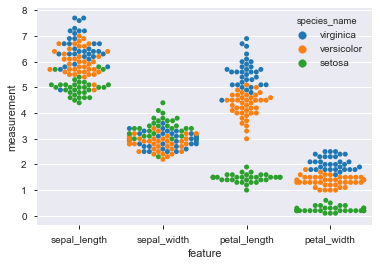

In [64]:
swarm = sns.swarmplot(x="feature", y="measurement", hue="species_name",data=iris_melt)

**TAKEAWAYS**  
  
**Sepals**
- Setosas have shorter and wider sepals compated to Virginicas and Versicolors.
- Virginicas have the longest sepals among the three.  

**Petals**
- Among all the three species:
    - Setosas have the shortest and narrowest petals.
    - Versicolors have longer and wider petals than Setosas.
    - Virginica have the biggest petals in terms of length and width.
---

### Create Logistic Model
<a id=log></a>

Fit the logistic regression classifier to `iris_train` and make predictions using `X_train` and `X_test` for comparison.

In [65]:
log_model = LogisticRegression(C=1, random_state = 123, solver='liblinear').fit(X_train, y_train)
yhat_train = log_model.predict(X_train)

yhat_train = pd.DataFrame(yhat_train).set_index=y_train
yhat_test = pd.DataFrame(yhat_test).set_index=y_test

>Note: I experimented with different solvers including `saga` and found `liblinear` to produce the highest accuracy, so I pursued the latter.

Evaluate in-sample (train) results using the model score, confusion matrix, and classification report.

**Model's Score**

Run the model on both on train and test data (as opposed to test only) to check for model overfitting.

In [67]:
insample_score = log_model.score(X_train,y_train)
outofsample_score = log_model.score(X_test,y_test)

print(f"""
Model's Accuracy when fitted to train data is
  {round(insample_score,3)}
Model's Accuracy when fitted to test data is
  {round(outofsample_score,3)}
""")


Model's Accuracy when fitted to train data is
  0.952
Model's Accuracy when fitted to test data is
  0.978



**Confusion Matrix**

In [68]:
conf_matrix = confusion_matrix(y_test, yhat_test)

In [69]:
predicted_labels = ["p_setosa", "p_versicolor", "p_virginica"]
actual_labels = ["a_setosa", "a_versicolor", "a_virginica"]

conf_matrix = pd.DataFrame(conf_matrix, index=actual_labels, columns=predicted_labels)
conf_matrix

,p_setosa,p_versicolor,p_virginica
a_setosa,18,0,0
a_versicolor,0,10,0
a_virginica,0,0,17


> Legend:  
p_ = predicted  
a_ = actual

**Classification Report**

In [70]:
cr = classification_report(y_test, yhat_test)
print(cr)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Create Decision Tree Model

Fit the decision tree classifier to `iris_train` and make predictions using `X_train` and `X_test` for comparison.

In [71]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=123)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

**Model's Score**

In [73]:
insample_score_dt = dt_model.score(X_train,y_train)
outofsample_score_dt = dt_model.score(X_test,y_test)

print(f"""
Model's Accuracy when fitted to train data is
  {round(insample_score_dt,3)}
Model's Accuracy when fitted to test data is
  {round(outofsample_score_dt,3)}
""")


Model's Accuracy when fitted to train data is
  0.981
Model's Accuracy when fitted to test data is
  0.933



**Confusion Matrix**

In [74]:
yhat_test_dt = dt_model.predict(X_test)

conf_matrix_dt = pd.DataFrame(confusion_matrix(y_test,yhat_test),index=actual_labels, columns=predicted_labels)
conf_matrix_dt

,p_setosa,p_versicolor,p_virginica
a_setosa,18,0,0
a_versicolor,0,10,0
a_virginica,0,0,17


**Classification Report**

In [75]:
cr_dt = classification_report(y_test, yhat_test_dt)
print(cr_dt)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.77      1.00      0.87        10
   virginica       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45



### Create a Random Forest Model

Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 20.  

In [88]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=10,
                            max_depth=20, 
                            random_state=123)

In [89]:
rf.fit(X_train, y_train)
print(rf.feature_importances_)

[0.06560133 0.00908458 0.51873666 0.40657743]


In [82]:
yhat_train = rf.predict(X_train)

Evaluate your results using the model score, confusion matrix, and classification report.  

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.  

Run through steps increasing your min_samples_leaf to 5 and decreasing your max_depth to 3.  
  
What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

**Model's Score**

In [97]:
insample_score_rf = rf.score(X_train,y_train)
outofsample_score_rf = rf.score(X_test,y_test)

print(f"""
Model's Accuracy when fitted to train data is
  {round(insample_score_rf,3)}
Model's Accuracy when fitted to test data is
  {round(outofsample_score_rf,3)}
""")


Model's Accuracy when fitted to train data is
  1.0
Model's Accuracy when fitted to test data is
  0.956



**Confusion Matrix**

In [99]:
yhat_test_rf = rf.predict(X_test)

conf_matrix_rf = pd.DataFrame(confusion_matrix(y_test,yhat_test),index=actual_labels, columns=predicted_labels)
conf_matrix_rf

,p_setosa,p_versicolor,p_virginica
a_setosa,18,0,0
a_versicolor,0,10,0
a_virginica,0,0,17


**Classification Report**

In [105]:
print(classification_report(y_test, yhat_test_rf))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [93]:
rf2 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=10,
                            max_depth=3, 
                            random_state=123)

In [107]:
rf2.fit(X_train, y_train)
print(rf2.feature_importances_)

[0.05740151 0.00225385 0.50512211 0.43522253]


In [108]:
yhat_train2 = rf2.predict(X_train)

In [109]:
insample_score_rf2 = rf2.score(X_train,y_train)
outofsample_score_rf2 = rf2.score(X_test,y_test)

print(f"""
Model's Accuracy when fitted to train data is
  {round(insample_score_rf2,3)}
Model's Accuracy when fitted to test data is
  {round(outofsample_score_rf2,3)}
""")


Model's Accuracy when fitted to train data is
  0.962
Model's Accuracy when fitted to test data is
  0.956



In [110]:
yhat_test_rf2 = rf2.predict(X_test)

conf_matrix_rf2 = pd.DataFrame(confusion_matrix(y_test,yhat_test),index=actual_labels, columns=predicted_labels)
conf_matrix_rf2

,p_setosa,p_versicolor,p_virginica
a_setosa,18,0,0
a_versicolor,0,10,0
a_virginica,0,0,17


In [111]:
print(classification_report(y_test, yhat_test_rf2))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



### KNN

Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)  

Evaluate your results using the model score, confusion matrix, and classification report.
  
Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
  
Run through steps 2-4 setting k to 10
  
Run through setps 2-4 setting k to 20
  
What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?